<a href="https://colab.research.google.com/github/hardikkamboj/Deep-Learning-for-Vision-Systems/blob/main/Chapter_4_Building_training_evaluating_a_newtork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
#import dependencies
from keras import backend as K
from sklearn.datasets import make_blobs
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
X, y = make_blobs(n_samples=1000, centers=4, n_features=2, cluster_std=2, random_state=2)


In [5]:
X.shape

(1000, 2)

In [6]:
y.shape

(1000,)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


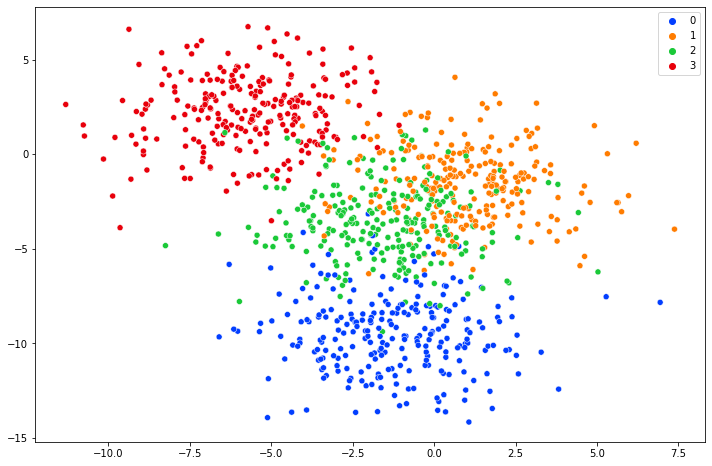

In [13]:
plt.figure(figsize = (12,8))
sns.scatterplot(X[:,0],X[:,1],hue = y,palette = 'bright')

In [16]:
print(y.shape)
y[:5]


(1000,)


array([2, 2, 2, 1, 1])

In [17]:
y = to_categorical(y)
y.shape

(1000, 4)

In [18]:
y[:5]

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]], dtype=float32)

In [19]:
# split into 80% training data and 20% test data 
# note that we did not create a validation dataset in this example for simplicity
n_train = 800
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
print(trainX.shape, testX.shape)

(800, 2) (200, 2)


In [20]:
# develop the baseline model architecture
# here we are building a very simple, two-layer network
model = Sequential()
model.add(Dense(25, input_dim=2, activation='relu'))
model.add(Dense(4, activation='softmax')) # four hidden units because we have 4 label classes
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 25)                75        
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 104       
Total params: 179
Trainable params: 179
Non-trainable params: 0
_________________________________________________________________


In [21]:
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=500, verbose=1)

Epoch 1/500
25/25 [==============================] - 1s 8ms/step - loss: 1.8161 - accuracy: 0.2637 - val_loss: 1.4649 - val_accuracy: 0.2650
Epoch 2/500
25/25 [==============================] - 0s 2ms/step - loss: 1.3968 - accuracy: 0.2450 - val_loss: 1.1867 - val_accuracy: 0.2850
Epoch 3/500
25/25 [==============================] - 0s 2ms/step - loss: 1.1212 - accuracy: 0.3328 - val_loss: 0.9949 - val_accuracy: 0.4000
Epoch 4/500
25/25 [==============================] - 0s 2ms/step - loss: 0.9510 - accuracy: 0.5141 - val_loss: 0.8791 - val_accuracy: 0.6450
Epoch 5/500
25/25 [==============================] - 0s 2ms/step - loss: 0.8388 - accuracy: 0.6726 - val_loss: 0.8096 - val_accuracy: 0.7200
Epoch 6/500
25/25 [==============================] - 0s 2ms/step - loss: 0.7493 - accuracy: 0.7377 - val_loss: 0.7650 - val_accuracy: 0.7250
Epoch 7/500
25/25 [==============================] - 0s 2ms/step - loss: 0.7115 - accuracy: 0.7520 - val_loss: 0.7354 - val_accuracy: 0.7400
Epoch 8/500
2

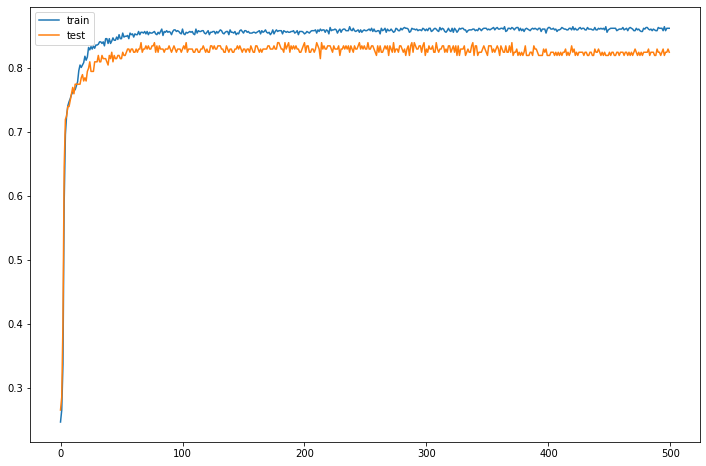

In [23]:
plt.figure(figsize = (12,8))
# plot learning curves of model accuracy
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In [25]:

# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.864, Test: 0.825
